In [1]:
import pandas as pd
X = pd.read_csv('./data/avila-tr_feats.csv')  
y = pd.read_csv('./data/avila-tr_target.csv')

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
def plot_and_print(model):
    history = model.fit(X_train,y_train,epochs =100,validation_split=0.2,batch_size=20,shuffle=False,verbose=0)
    import matplotlib.pyplot as plt 
    import matplotlib
    %matplotlib inline 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    res = model.evaluate(X_test, y_test, batch_size=None, verbose=0)
    print(f"Test Loss:{res[0]:.4f} Accuracy:{res[1]:.4f}")
    print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Test Loss:0.4278 Accuracy:0.7857
Best Accuracy on Validation Set = 0.7789095044136047


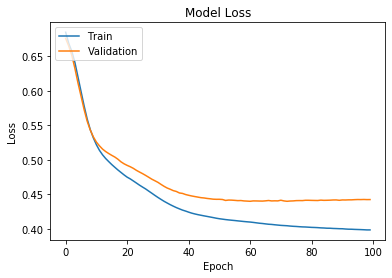

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation

model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=X.shape[1]))
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
plot_and_print(model)

Test Loss:0.4572 Accuracy:0.7833
Best Accuracy on Validation Set = 0.7777112126350403
Test Loss:0.5579 Accuracy:0.7244
Best Accuracy on Validation Set = 0.7315757870674133
Test Loss:0.4660 Accuracy:0.7761
Best Accuracy on Validation Set = 0.7723187804222107


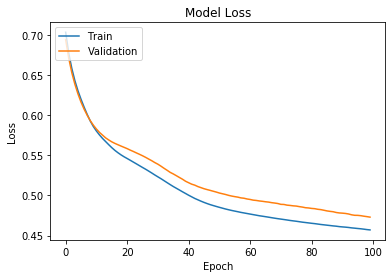

In [22]:
from keras.regularizers import l2
for param in [0.01,0.1,0.005]:
    model = Sequential()
    model.add(Dense(units=10,activation='relu',input_dim=X.shape[1]))
    model.add(Dense(units=6,activation='relu',kernel_regularizer=l2(param)))
    model.add(Dense(units=4,activation='relu',kernel_regularizer=l2(param)))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    plot_and_print(model)

Test Loss:0.4799 Accuracy:0.7828
Best Accuracy on Validation Set = 0.7717195749282837
Test Loss:0.5005 Accuracy:0.7689
Best Accuracy on Validation Set = 0.7669262886047363


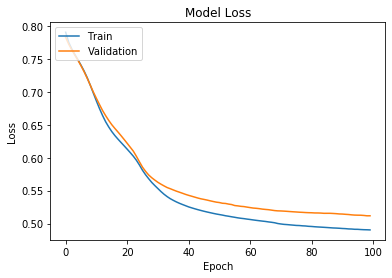

In [23]:
from keras.regularizers import l1
for param in [0.01,0.005]:
    model = Sequential()
    model.add(Dense(units=10,activation='relu',input_dim=X.shape[1]))
    model.add(Dense(units=6,activation='relu',kernel_regularizer=l1(param)))
    model.add(Dense(units=4,activation='relu',kernel_regularizer=l1(param)))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    plot_and_print(model)

Test Loss:0.6736 Accuracy:0.6021
Best Accuracy on Validation Set = 0.5769922137260437


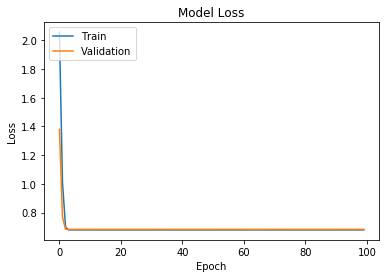

In [24]:
from keras.regularizers import l1_l2
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=X.shape[1]))
model.add(Dense(units=6,activation='relu',kernel_regularizer=l1_l2(0.05,0.05)))
model.add(Dense(units=4,activation='relu',kernel_regularizer=l1_l2(0.05,0.05)))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
plot_and_print(model)